In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/kmeans/student_clustering.csv')

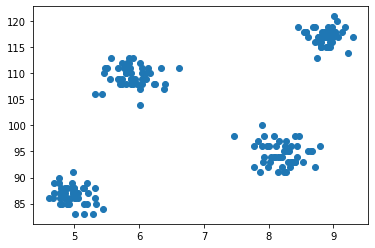

In [2]:
plt.scatter(df['cgpa'],df['iq'])

In [3]:
df.shape

(200, 2)

In [34]:
df.isnull().sum()

cgpa    0
iq      0
dtype: int64

In [4]:
X= df.iloc[:,:].values# values kiye taki hata sake dataframe ke format se 

In [12]:
X[:4]

array([[  5.13,  88.  ],
       [  5.9 , 113.  ],
       [  8.36,  93.  ],
       [  8.27,  97.  ]])

In [13]:
# Y me split nahi kiye

In [14]:
#for row in X:
   # print(row)

In [15]:
import random

In [50]:

class KMean:
    def __init__(self,n_clusters=2,max_iter=100):
        self.n_clusters=n_clusters
        self.max_iter= max_iter
        self.centroids = None
    def fit_predict(self,X):
        random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids = X[random_index]
        #print(self.centroids)
        for i in range(self.max_iter):
            # assign clusters 
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            # move centroids 
            self.centroids = self.move_centroids(X,cluster_group)
            # check finish
            if (old_centroids == self.centroids).all():
                break
        return cluster_group
            
    def assign_clusters(self,X):
        cluster_group = []# 2 cluster he hamare pass toh har point ka in 2 cluster se distance calculate karna hoga 
        distance = []
        for row in X:
            for centeroid in self.centroids:# eucledian distance claculate karna hoga
                distance.append(np.sqrt(np.dot(row-centeroid,row-centeroid)))
            #print(distance)
            min_distance = min(distance)
            index_pos = distance.index(min_distance)
            #print(index_pos)
            cluster_group.append(index_pos)
            
            distance.clear()
        return np.array(cluster_group)
    def move_centroids(self,X,cluster_group):# yaha pe bass sara index_pos ka mean nikalna he 0 ka alag aur 1 ka alag
        new_centroids = [] # yaha pe 2 cluster the par kalko jayada agaya toh uske liye kitne unique cluster he
        # vo nikalna hoga
        cluster_type = np.unique(cluster_group)
        for types in cluster_type:
            new_centroids.append(X[cluster_group==types].mean(axis=0))
        return np.array(new_centroids)
        
        
        

In [51]:
m = KMean(n_clusters=4)
y_means = m.fit_predict(X)

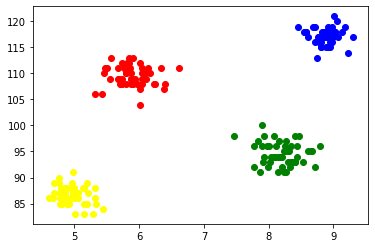

In [52]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='red')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='blue')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')
plt.show()